# **WAZE CHURN ANALYSIS**

### Overview

Waze is subsidiary company of Google that provides satellite navigation on devices that supports GPS. The leadership at Waze has tasked the data team with developing a machine learning model for anticipating user attrition. This model relies on information gathered from individuals using the Waze application. 

### Objective

To develop a ML model for predicting user churn using data obtained from users of the Waze app

### **Stages**

* Stage 1: Inspection and Analyze Data
* Stage 2: Exploratory Data Analysis - EDA
* Stage 3: Hypothesis Testing and Data Exploration
* Stage 4: Regression Modeling

# **Stage 1: Inspect and Analyze Data**

### Purpose

To investigate and understand the data by constructing dataframe with python and perform cursory inspection of the dataset

### Key Activities

* Prepae the data by reviewing the data dictionary, and conducting an initial exploration of the dataset to pinpoint essential variables for the stakeholder's needs
* Generate a pandas dataframe to facilitate data learning, future exploratory data analysis (EDA), and statistical tasks

* Aggregate comprehensive summary details about the dataset to guide subsequent actions

### **Activity 1a. Imports and data loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

In [2]:
# Load dataset into dataframe
# Load dataset into dataframe
df = pd.read_csv(r'E:/Advance Google Data Analytics/Waze/waze_dataset.csv')
df.head(10)


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


### **Activity 1b. Information Summary**

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Key Takeaways:**

1. First 10 observations have no missing value, in-depth analysis for missing value still needed.
2. The dataset consists of 14,999 rows and 13 columns. The variable types are as follows:
    * label and device are categorical variables of type object.
    * total_sessions, driven_km_drives, and duration_minutes_drives are numerical variables of type float64.
    * The remaining variables are numerical variables of type int64.
3. Within the dataset, the label column contains 700 missing values.

### **Activity 1b. Null values and summary statistics**
Contrast the summary statistics of the 700 rows that are missing labels with the summary statistics of the rows containing complete data.


In [5]:
null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [6]:
# Isolate rows without null values
not_null_df = df[~df['label'].isnull()]
# Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Key Takeaway:**

>  The means and standard deviations are fairly consistent between the two groups having missing data and complete data

### **Activity 1c. Device Count by Null Values**

In [7]:
# Get count of null values by device
null_df['device'].value_counts()

# Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

**Key Takeaway:**

>  Out of **700** rows with missing values, **447** were iPhone users and **253** were Android users.

### **Activity 1d. Device Ratio Comparison**

Comparing device ratio within the **Null Values** in dataset

In [8]:
# Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

Comparing to the device ratio within **Complete** dataset

In [9]:
# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

**Key Takeaway:**

>  * The percentage of missing values by each device is consistent with their representation in the data overall.
> * There is nothing to suggest a non-random cause of the missing data

### **Activity 1d. Churned Vs Retained Users**

In [10]:
# Calculate counts of churned vs. retained
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

retained    11763
churned      2536
Name: label, dtype: int64

retained    0.822645
churned     0.177355
Name: label, dtype: float64


### Key Takeaway:
> This dataset contains 82% retained users and 18% churned users.

Median comparison of retained and churned Users, we use median to minimize outliers unduly affect the analysis

In [11]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


### Key Takeaway:
> * Churned users had about ~3 more drives on average in the past month than retained users. Meanwhile, retained users used the app for more than twice the number of days compared to churned users in the same period.

> * The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

> * This pattern indicates that churned users engaged in a higher frequency of drives within a shorter span, with farther trips and longer durations.  This could potentially hint at distinctive user profiles

### **Activity 1e. Comparison - Average Kilometers/Drive**

In [12]:
# Group data by `label` and calculate the medians
medians_by_label = df.groupby('label').median(numeric_only=True)
print('Median kilometers per drive:')
# Divide the median distance by median number of drives
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

### Key Takeaway:
> The median user from both groups drove ~73 km/drive. How many kilometers per driving day was this?

**Median kilometers per driving day**

In [13]:
  # Divide the median distance by median number of driving days
print('Median kilometers per driving day:')
medians_by_label['driven_km_drives'] / medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

**Median number of drives per driving day for each group**

In [14]:
# Divide the median number of drives by median number of driving days
print('Median drives per driving day:')
medians_by_label['drives'] / medians_by_label['driving_days']

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

### Key Takeaway:
> * Median churned user covered **608 kilometers** per driving day last month, nearly **250%** more than retained users. Similarly, the median churned user had significantly more drives per drive day compared to retained users

> * These figures clearly show that the users in the dataset, regardless of churn status, are avid drivers. It's likely that the data doesn't represent typical drivers. The sample of churned users might consist largely of **long-haul truckers**

> * Given the extensive driving habits of these users, it's advisable for Waze to consider collecting additional data on these highly active drivers. The underlying reason for their high mileage could potentially shed light on why the Waze app might not align with their unique requirements. These needs might differ significantly from those of a more usual driver, like a daily commuter

**Counts of each device type for each group - churned and retained**

In [15]:
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

Now, within each group, churned and retained, calculate what percent was Android and what percent was iPhone.

In [16]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

df.groupby('label')['device'].value_counts(normalize = True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

### Key Takeaway:
> * The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

## **Conclusion - Inspect and Analyze Data**

> * The dataset has **700 missing values** in the `label` column. There was no obvious pattern to the missing values
> * Mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values
> * investigation gave rise to **further questions**, the median user who churned drove 608 kilometers each day they drove last month, which is almost **250%** the per-drive-day distance of retained users. It would be helpful to know how this data was collected and if it represents a non-random sample of users
> * **Android users** comprised approximately **36%** of the sample, while **iPhone users** made up about **64%**
> * Generally, users who churned **drove farther** and **longer in fewer days** than **retained users**. They also used the app about **half as many times** as retained users over the same period
> * The **churn rate** for both **iPhone and Android users** was within one percentage point of each other. **There is nothing suggestive of churn being correlated with device**

---

# **Stage 2: Exploratory Data Analysis - EDA**

### Purpose

To conduct exploratory data analysis (EDA) on a provided dataset

### Goal

To continue examination by further exploring data and adding relevant visualizations that help in communicating the data story

### Key Activities

> * Import and Load data
> * Data Exploration & Data Cleaning
> * Creating Visualizations
> * Evaluating and sharing results

### Activity 2a - Import and load data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
# Load the dataset into a dataframe
df = pd.read_csv('E:\Advance Google Data Analytics\Waze\waze_dataset.csv')

### Key Takeaway:
> * Data is in structured format, each row represents an individual user
> * **700** rows have label missing, Other variables have no missing values

### **Activity 2b - Data Exploration and Data Cleaning**

#### **Data overview and summary statistics**

I will use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

In [19]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [20]:
df.size

194987

In [21]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### **Identifying Outliers**

i will use numpy functions mean() and median(), then use boxplot to visualize the distribution of data


Handling outliers involves three options: deleting, reassigning, or leaving them as is. Your choice depends on dataset specifics and modeling goals.

> **Delete:** Remove outliers if they're errors or the dataset is for modeling. This option is used less frequently.

> **Reassign:** Create new values to replace outliers in small datasets or when preparing data for modeling.

> **Leave:** Keep outliers for exploratory analysis or when the model is robust to outliers (*we will follow this one as we want further exploration*)

### **Activity 2c - Visualizations**

We will construct viz of following events

* Session
* Drives
* Total Sessions
* No of Days after on boarding
* Driven Km Drives
* Duration in minutes during complete month
* App Activity during complete month
* No of days user drives during complete month
* Device Distribution
* Labels(Churned, Retained)
* Driving Days, Activity Days
* Retention by Device
* Retention by kilometers driven per driving day
* Churn rate per number of driving days
* Proportion of sessions that occurred in the last month

### **Sessions**

*The frequency of a user accessing the app within the month*

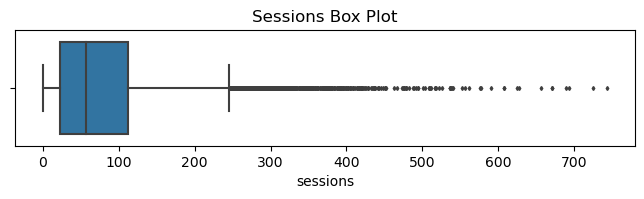

In [23]:
# Box plot
# Create a centered box plot
plt.figure(figsize=(8, 1.5))  
sns.boxplot(x=df['sessions'], fliersize=2)
plt.title('Sessions Box Plot')
plt.show()  # Display the plot

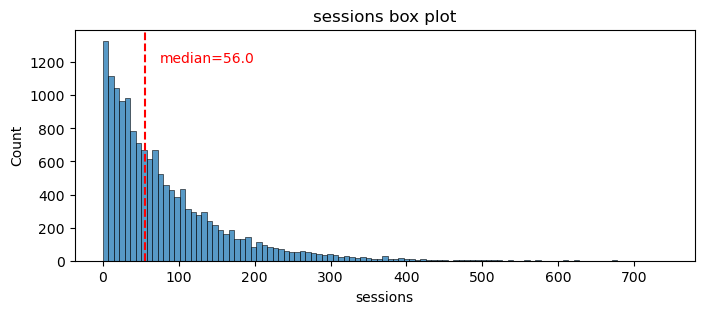

In [24]:
# Histogram
plt.figure(figsize=(8, 3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

#### **Key Takeaways**

* The `sessions` variable exhibits a right-skewed distribution, with approximately **50%** of  data points having **56 sessions** or fewer
* As depicted in the boxplot, there are instances where certain users have accumulated more than **700 sessions**

### **Drives**

*An instance of traveling a distance of at least 1 kilometer within the span of a month

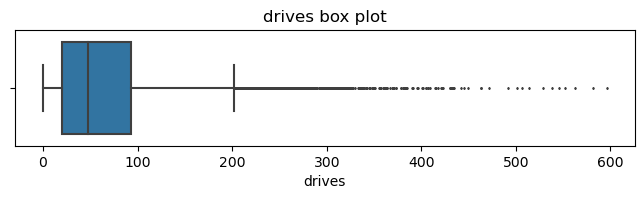

In [25]:
# Box plot
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

In [26]:
def histogrammer(column_str, median_text=True, **kwargs):
    """
    Helper function to plot histograms based on the format of the `sessions` histogram.

    Parameters:
    - column_str (str): The name of the column in the DataFrame to be plotted.
    - median_text (bool, optional): Whether to display the median value as text on the plot (default is True).
    - **kwargs: Additional keyword arguments to be passed to the sns.histplot() function.

    Returns:
    - None: This function displays the histogram plot with an optional median line and text.
    """
    median = round(df[column_str].median(), 1)
    plt.figure(figsize=(8, 2.5))
    ax = sns.histplot(x=df[column_str], **kwargs)  # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')  # Plot the median line
    if median_text == True:  # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
                ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram')


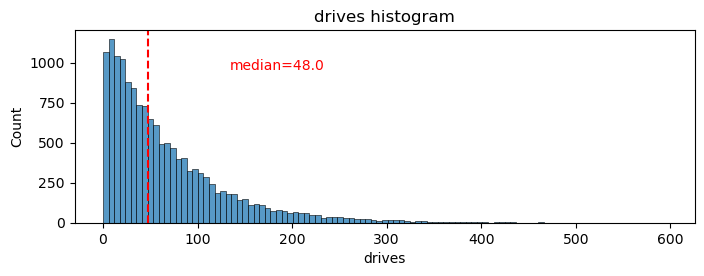

In [27]:
# Histogram
histogrammer('drives')

#### **Key Takeaways**

* The distribution of the `drives` data **closely resembles** that of the `sessions` variable
* It exhibits a **right-skewed pattern** that approximates a log-normal distribution, with a **median** of **48**
* There are instances where certain drivers recorded more than **400 drives** within the **past month**

#### **Total Sessions**

Calculation of the cumulative count of sessions that have occurred since a user's initial onboarding.

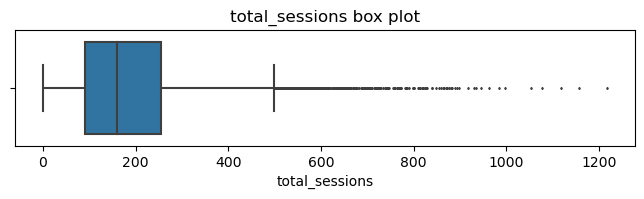

In [28]:
# Box plot
plt.figure(figsize=(8, 1.5))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

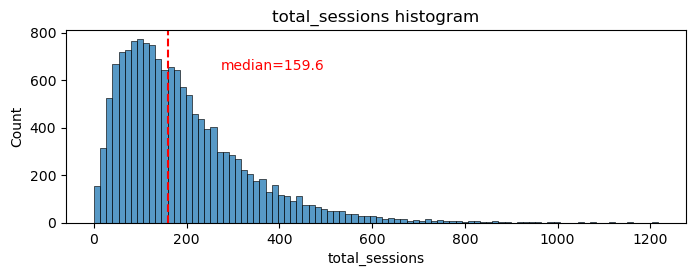

In [29]:
# Histogram
histogrammer('total_sessions')

* The distribution of `total_sessions` is skewed to the **right**
* The median value for the **total number of sessions** is approximately **159.6**
* This piece of information is intriguing because, when comparing it to the median number of sessions in the **last month (which was 48)**, it suggests that a substantial portion of a user's **overall sessions** may have occurred within that **last month**
* This presents an interesting aspect for **further investigation** in the future

#### **No of Days after Onboarding**

_The duration in days since a user registered for the app._

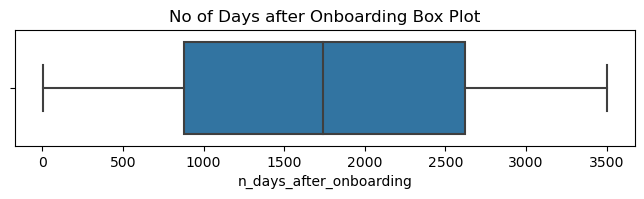

In [30]:
# Box plot
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('No of Days after Onboarding Box Plot');

Median: 1741.0


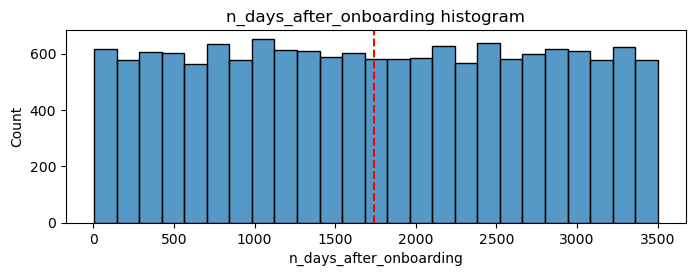

In [31]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

#### **Key Takeaway**
> * The complete user tenure, which represents the number of days since onboarding, follows a **uniform distribution**
> * Values ranging from almost **0** to approximately **3,500 days**, ~ **9.5 years**

#### **Driven Km Drives**

_Total kilometers driven during the month_

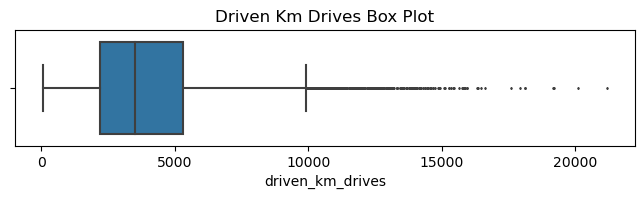

In [32]:
# Box plot
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('Driven Km Drives Box Plot');

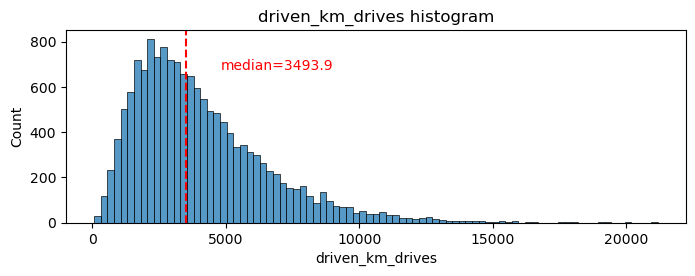

In [33]:
# Histogram
histogrammer('driven_km_drives')

> #### **Key Takeaways**
* The distribution of drives per user in the **past month** is **right-skewed**
* Around **50%** of users have driven less than **3,495 kms** during that time
* Earlier analysis highlights the dataset's notably **active drivers**
* The **longest distance** driven within a month exceeds **half** of Earth's circumference

#### **Duration of Drives in Minutes**

_Total duration driven in minutes during the month_

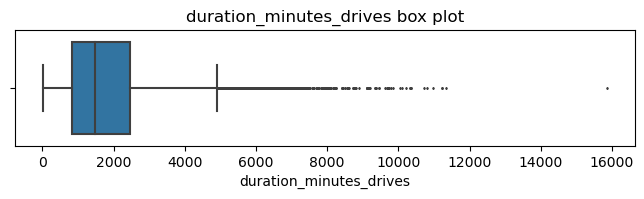

In [34]:
# Box plot
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

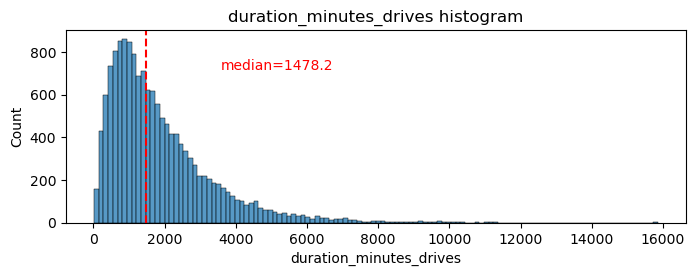

In [35]:
# Histogram
histogrammer('duration_minutes_drives')

#### **Key Takeaway**
* The `duration_minutes_drives` variable has a heavily **skewed right tail**
* **50%** of users drove less than **\~1,478 minutes** **(\~25 hours)**, but some users clocked over **250 hours** over the month

#### **Activity Days**

_The count of days within a month when a user opens the app_

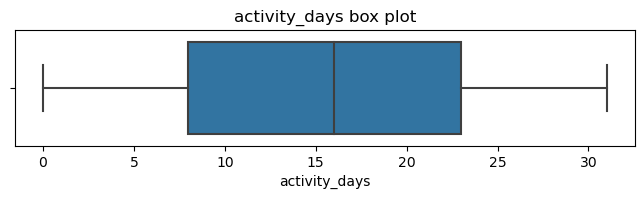

In [36]:
# Box plot
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

Median: 16.0


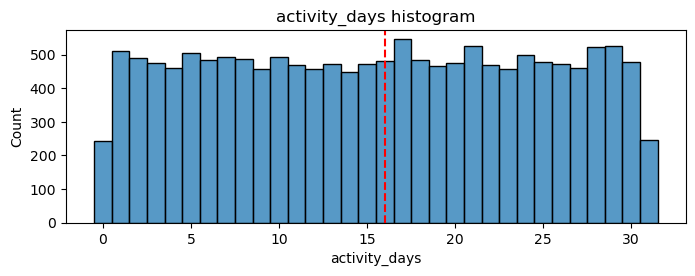

In [37]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

- In the last month, users, on average, opened the app approximately **16 times**, as indicated by the median
- The box plot illustrates a distribution that is **centered around this median** value
- The histogram displays a nearly uniform distribution, with around **500 people** opening the app on each count of days
- Approximately **250 users did not open** the app at all during the month, while another **250 users opened** the app **every day** of the month.
- This distribution is noteworthy because it differs from the sessions distribution, suggesting that **activity_days** and **sessions** are **not closely correlated** despite initial expectations"

#### **Driving Days**

_Number of days the user drives (at least 1 km) during the month_

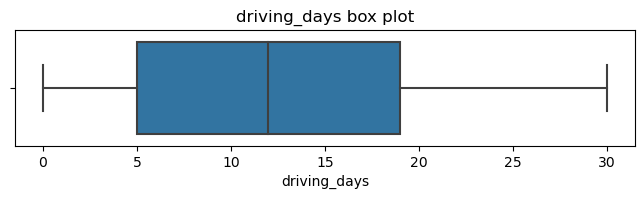

In [38]:
# Box plot
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


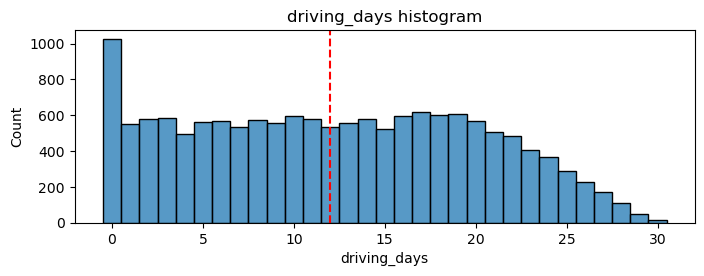

In [39]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

> #### **Key Takeaways**
> * Driving activities each month follows an almost **uniform distribution** similar to the number of days they **opened** the **app** during the same month, with one exception: the distribution of **`driving_days`** tails off on the **right**
> * Nearly twice as many users (around **1,000** vs. **500**) who did not drive at all during the month compared to those who did (approximately **550 users**). While variable had **\~500 users** opening the app on each of most of the day counts, but there were only **\~250 users** who did not open the app at all during the month and **~250** users who opened the app every day.
> * This discrepancy is intriguing and warrants **further investigation** in the future

#### **Device Distribution**

_The device type with which a user initiates a session._

**Note**: For categorical varriable i recommend using **pie chart**

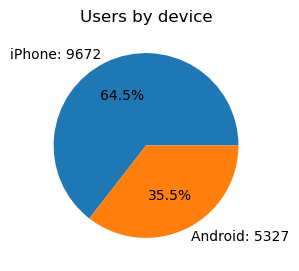

In [40]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

#### **Key Takeaway**
iPhone users **outnumber** Android users by almost **two to one** in this dataset

#### **`Label`**

label is Binary target variable (“retained” vs “churned”) if a user has churned anytime during the course of the month

**Note:** Being a categorical variable, i recommend to plot a pie chart 

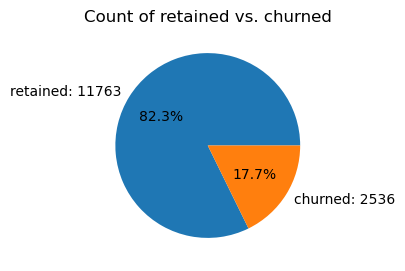

In [41]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

> **Key Takeawy:** *Less than **18%** of the users churned*

#### **Driving days vs. Activity days**

Plot a combined histogram for driving days and user days to visualize their relationship and avoid the need for separate comparisons as both `driving_days` and `activity_days` represent counts of days over a month


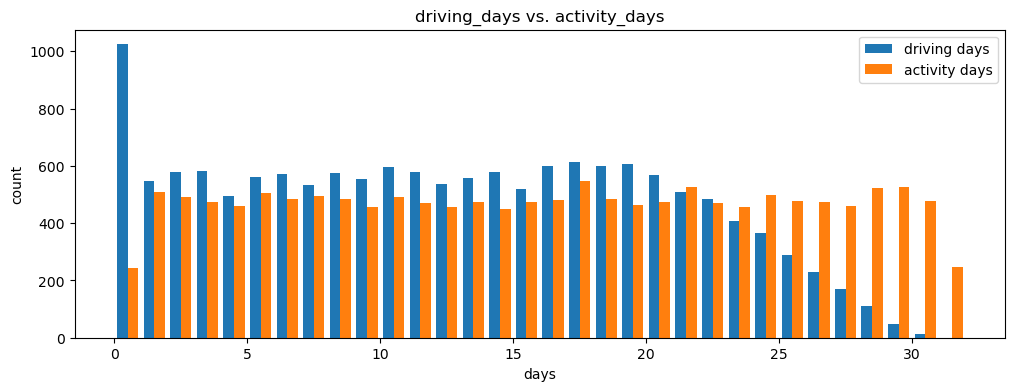

In [42]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

#### **Key Takeaway**
* This apparent contradiction **raises questions**: Why are there **fewer people** who **never used** the app in a month, but **more** who **never drove** during that time?
* It suggests that while these variables are related, they aren't identical. Users likely **open** the app for **various reasons beyond driving**, such as checking traffic or making settings adjustments
* **Contacting** Waze's data team for insights is advisable, especially given the potential discrepancy in the number of days considered in each variable
* Confirm the maximum days for each variable: `driving_days` and `activity_days`.

In [43]:
print('Driving days:', df['driving_days'].max())
print('Activity days:', df['activity_days'].max())

Driving days: 30
Activity days: 31


**It's true**. it's highly improbable that **not a single user drove** all **31 days** of the **month**, especially with **15,000 people** in the dataset

To further **validate** these variables, i will create a straightforward **scatter plot**, where one variable is plotted on the x-axis and the other on the y-axis. This will provide a visual representation of their relationship.

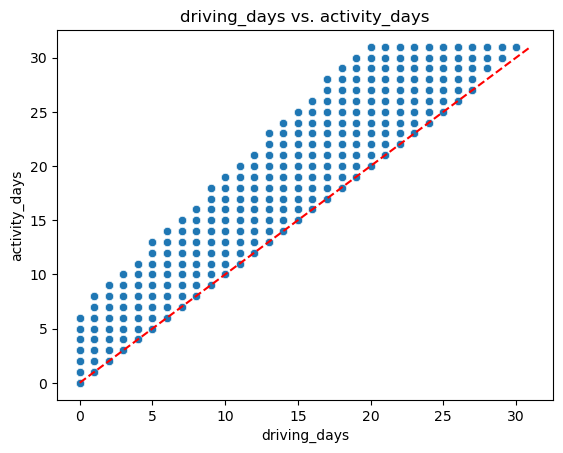

In [44]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

**Note:** 
* There is a theoretical limit, if you use the app for driving, it inherently **counts** as a **day of app usage** as well. Therefore, it's 
**impossible to have more drive-days than activity-days**. Fortunately, *none of the samples in this dataset **violate** this fundamental rule, which is a positive finding.*

#### **Retention by device**

Create a histogram with four bars, representing each combination of device to check the proportion of churned users to retained users 

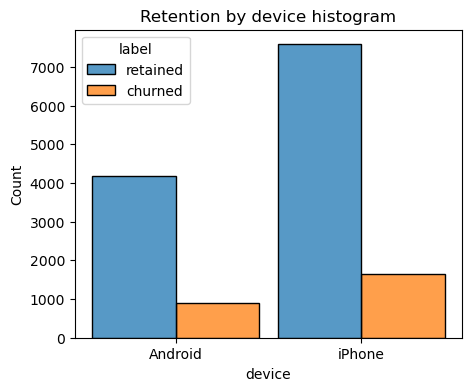

In [45]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

*The proportion of churned users to retained users is consistent between device types* 

#### **Retention by kilometers driven per driving day**

Previously we discovered that the **median distance** driven last month for users who **churned** was **8.33 km**, versus **3.36 km** for people who **did not churn**. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user

2. Call the `describe()` method on the new column

In [46]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# searches for infinite values (e.g., positive infinity) in the 
# 'km_per_driving_day' column of the DataFrame 'df'. 
# When an infinite value is found, it is replaced with zero using the loc function. 

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

**Note:**
> * Mean, Max Value value is infinity
> * Standard deviation is NaN

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Use `np.inf` to convert these values from infinity to zero
2. Call describe() on km_per_driving_day to verify

In [47]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **Key Takeaways**
> * Maximum value is 15,420 kilometers _per drive day_, which is physically impossible
> * Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, **disregard rows where the distance in this column is greater than 1,200 km**

Create a histogram for the `km_per_driving_day` column, excluding values above 1,200 km. Use two colors in each bar to represent the percentage of churned and retained users, accomplished by setting the `multiple` parameter in seaborn's `histplot()`(https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`

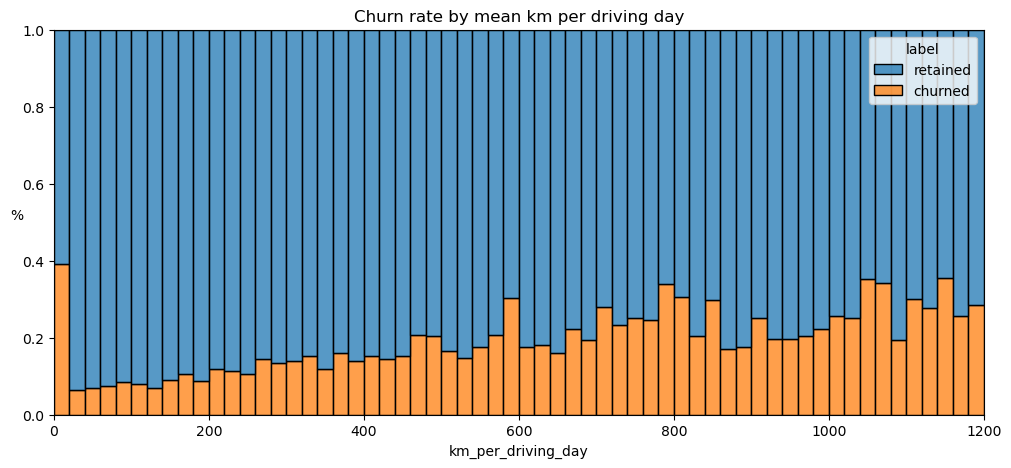

In [48]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

**Churn rate** tends to **increase** as the mean daily **distance driven increases**, confirming previous findings. It would be worth investigating further the **reasons** for **long-distance users** to **discontinue using the app**.

#### **Churn Rate per Number of Driving Days**

Create histogram to represent the churn rate for each number of driving days

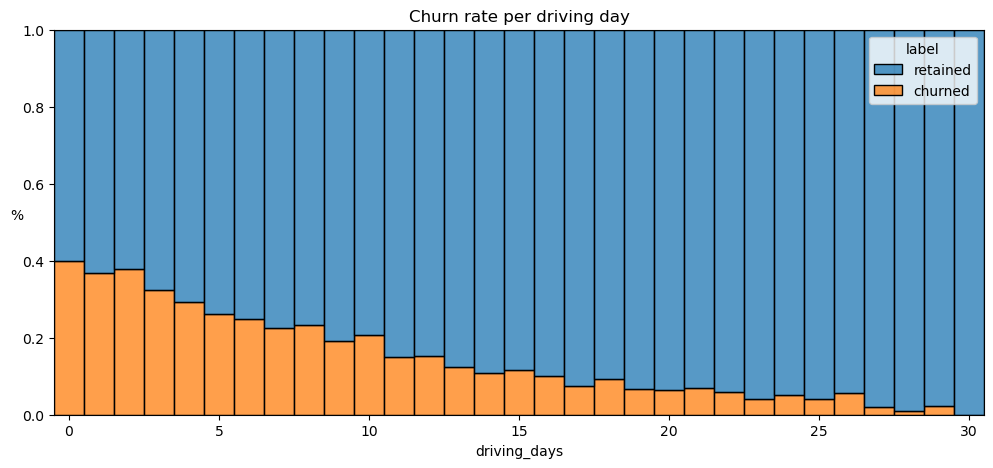

In [49]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

#### **Key Takeaways:**
* **Churn rate** is **highest** among users with minimal last month app usage
* Churning **decreases** as app **usage frequency** increases
* Notably, **40% churned** among those who didn't use the app at all, while **none churned** among those who used it for all **30 days**

**Note:** If people who used the app a lot churned, it would likely indicate **dissatisfaction**. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a **lesser need** for a **navigational app**. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of Sessions that Occurred in the Last Month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [50]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [51]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

Median: 0.4


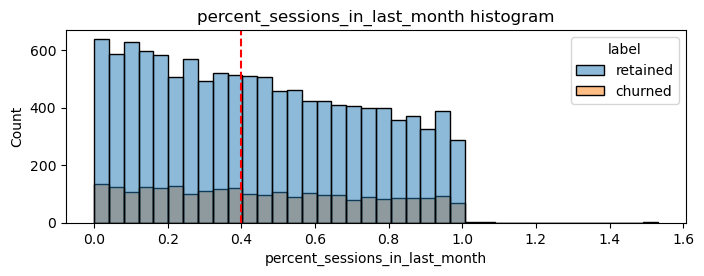

In [52]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

Check the median value of the `n_days_after_onboarding` variable.

In [53]:
df['n_days_after_onboarding'].median()

1741.0

*Half of the people in the dataset had **40%** or more of their sessions in just the **last month**, yet the overall median time since onboarding is almost **five years**.*

This trend contrasts with the dataset's overall median time since onboarding, which is nearly five years. This suggests a significant surge in app usage among long-term users, possibly due to changing needs or circumstances.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

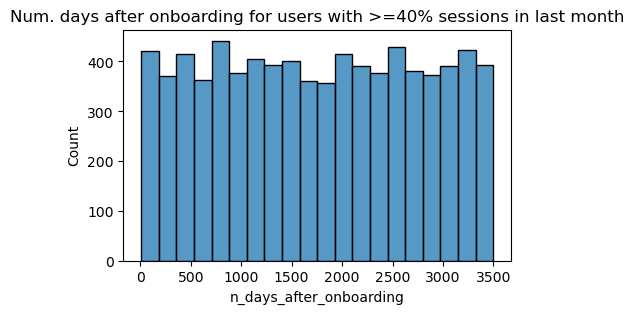

In [54]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

*The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.*

### **Activity 2d. Handling outliers**

The box plots we observed earlier in this section revealed the presence of outliers in many of these variables. These outliers do not appear to result from data entry errors; instead, they are a consequence of the right-skewed nature of the distributions

Replace outlying data points with more reasonable values. One approach to perform such **imputation** involves establishing a **threshold** based on the **95th percentile** of the distribution.

Lets create a function that **computes the 95th percentile** for a given column and subsequently replaces values exceeding this threshold with the 95th percentile value from the distribution

In [55]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Lets apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [56]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [57]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.



### **Activity 2e. Results and evaluation**

My Explorations ....

* There is missing data in the user churn label, so we might need  further data processing before further analysis.
* There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average, retained users have fewer drives than churned users.

My Obseravtions/ questions are ....

* How does the missingness in the user churn label arise?
* Who are the users with an extremely large number of drives? Are they ridesharing drivers or commercial drivers?
* Why do retained users have fewer drives than churned users? Is it because churned users have a longer history of using the Waze app?
* What is the user demographic for retained users and churned users?

My client would likely want to know ...

* What are the key variables associated with user churn?
* Can we implement policies to reduce user churn?




Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

In [58]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [59]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0.809524


### **Task 4b. Conclusion**

**1. Types of distributions in variables**

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

**2. Reasons why data was declared erroneous or problematic**

> *Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*

**3. Questions raised during investigation that requires further exploration**
> *Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?*

**4. Percentage of users churned Vs Retained?**

> *Less than 18% of users churned, and \~82% were retained.*

**5. Factors correlated with user churn and How**

> *Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.*

**6. Representation of new users vs long tenure users in this dataset**

> *No. Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*

***

# **Stage 3 - Hypothesis Testing and Data Exploration**

Lets explore the data provided and conduct a hypothesis test
<br/>

**The purpose** of this stage is to conduct a two-sample hypothesis test on Waze Data Set

**Target Goal**: *Develop a two-sample hypothesis test to analyze and determine whether there is a statistically significant difference between **mean number of rides** and **device type** – Android vs. iPhone.*
<br/>

### **Key Activities**
*This stage has three key activities:*

**Part 1:** **Imports and data loading**
* To import and load data packages necessary for hypothesis testing

**Part 2:** **Conduct hypothesis testing**
* Computing descriptive statistics for data analysis 

* To formulate null hypothesis and alternative hypothesis

**Part 3:** **Communicate insights with stakeholders**

* Key business insight(s) emerged from hypothesis test

* Business recommendations to propose based on our results

<br/>

### **Activity 3a - Imports and data loading**

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [60]:
# Import any relevant packages or libraries
import pandas as pd
from scipy import stats

Import the dataset.


In [61]:
# Load dataset into dataframe
# df = pd.read_csv('waze_dataset.csv') Already loaded

### **Activity 3b - Data exploration**

Use descriptive statistics to conduct exploratory eata analysis (EDA).


**Note:** In the dataset, `device` is a **categorical variable** with two labels: *iPhone* and *Android*.

To facilitate this analysis, it's essential to **map** each **label** to an **integer representation**. The code below assigns a value of **1** for *iPhone* users and **2** for *Android* users, saving this label in a new variable named `device_type`.

**Note:** The creation of a new variable is recommended to preserve the original data and prevent accidental overwriting


1. Create a dictionary `map_dictionary` with keys (`'Android'` and `'iPhone'`) and values(`2` and `1`) 

2. Create column `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.
</br></br>
When dictionary is passed to `Series.map()` method, it replaces data where data matches the dictionary's keys. The values that get imputed are the values of the dictionary.


In [62]:
# 1. Create `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

*Let's calculate the average number of drives for each device type to examine their relationship*

In [63]:
df.groupby('device_type')['drives'].mean()

device_type
1    64.446340
2    63.353482
Name: drives, dtype: float64



*Based on the averages, **iPhone** users tend to have more drives on average. However, this difference may be due to random sampling. To assess its **statistical significance**, conduct a **hypothesis test**.*



### **Activity 3c - Hypothesis testing**


Lets conduct a two-sample t-test. it consists of fol a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** Lets conduct a t-test for two independent samples as two groups are independent (Android users vs. iPhone users).


**Hypotheses:**

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

**Significance Level**
Lets choose 5% as the significance level and proceed with a two-sample t-test

lets use `stats.ttest_ind()` function to perform the test


**Technical note**: 
Set value of `equal_var` in `stats.ttest_ind()`  equals to `False`

1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [64]:
# 1. Isolate the `drives` column for iPhone users.

iPhone = df[df['device_type']==1]['drives']

Android = df[df['device_type']==2]['drives']

             
# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False) #equal_var=False specifies unequal variances between the two groups

Ttest_indResult(statistic=1.1643714136026293, pvalue=0.24429844267242223)

**Key Takeaway:**
> *Since the **p-value** is larger than the chosen **significance level (5%)**, we failed to reject the null hypothesis. We conclude that there is **not** a **statistically significant difference in the average number of drives between drivers** who use iPhones and drivers who use Androids.*

### **Activity 3d - Communicate insights with stakeholders**

* Business insight(s) drawn draw from hypothesis test:

> *The key business insight is that **drivers who use iPhone devices on average have a similar number of drives as those who use Androids.**

> *One potential next step is to explore what other factors influence the variation in the number of drives, and run additonal hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the Waze app may provide more data to investigate churn.*

---

# **Stage 4: Regression Modeling**

**The purpose** of this stage is to conduct EDA and Regression Modeling of Waze Data Set

**Target Goal**: *Build a binomial logistic regression model and evaluate the model's performance*
<br/>

### **Key Activities**

**Part 1:** EDA & Checking Model Assumptions
* To perform EDA before constructing a binomial logistic regression model

**Part 2:** Model Building and Evaluation
* Elaborate resources required complete this stage

**Part 3:** Interpreting Model Results

* key insights emerged from the model

* Business recommendations to propose based on the models built

<br/>

### **Activity 4a - Imports and data loading**

In [65]:

# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [66]:
# Load dataset into dataframe
df = pd.read_csv('E:\Advance Google Data Analytics\Waze\waze_dataset.csv')

## **Purpose of EDA Before Modeling**

*Some purposes of EDA before constructing a binomial logistic regression model*
> **Outlier Handling:** *Outliers and extreme data can impact models negatively. To address this:*
> - Drop rows with extreme values.
> - Substitute extreme data with averages.
> - Remove data values greater than 3 standard deviations.

> **Handling Missing Data:** *Dealing with missing data is essential. Consider:*
> - Deciding whether to exclude or include missing data.
> - Substituting missing values with dataset means, medians, or similar methods.

> **Feature Engineering:** *Enhance your dataset by creating new variables through:*
> - Multiplying existing variables.
> - Calculating ratios between two variables.

### **Activity 4b - Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



In [67]:
print(df.shape)

df.info()

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Key Takeaway:** 

> **Missing Values:** *`label` column is missing **700** values.*

In [68]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


**Drop Values:** Use the `drop()` method to **remove** the ID column as its not required for anlysis

In [69]:
df = df.drop('ID', axis=1)

Now, check the class **balance** of the **dependent** (target) variable, `label`.

In [70]:
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

In [71]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Key Takeaway:** *Varriables having Potential Outliers*
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


> *All of these columns have **max values** that are multiple standard deviations above the **75th percentile**. This could indicate outliers in these variables.*

### **Activity 4c - Create features**

Lets create relevant features required to address the business problem or meet stakeholder needs

#### **Creating `km-per-driving_day` Feature**

> - **Objective:** Churn rate correlates with distance driven per driving day in the last month. To address this, we will engineer a feature to capture this information.

> - **Action:** Create a new column in the DataFrame (df) called *km_per_driving_day*. This column will represent the mean distance driven per driving day for each user.

> - **Implementation:**
  ```python
  df['km_per_driving_day'] = df['distance_driven'] / df['driving_days']


In [72]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

#### **Handling Infinite Values in `km_per_driving_day`**

> - **Issue:** Some values in the `km_per_driving_day` column are infinite. This occurs due to zero values in the `driving_days` column, as division by zero is undefined in mathematics.

> - **Action Plan:** Convert these infinite values to zero using `np.inf` to represent infinity. Verify by calling the `describe()` method.

In [73]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **Creating `professional_driver` Feature**

- **Objective:** We aim to create a binary feature, `professional_driver`, which will be set to 1 for users who meet both of the following criteria:
   - Had 60 or more drives in the last month.
   - Drove on 15 or more days in the last month.

- **Purpose:** This feature is designed to distinguish professional drivers from other users. It's important to note that the thresholds for defining professional drivers are arbitrary and based on domain knowledge and intuition.


In [74]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

#### **Calculate churn rate within each class**

In [75]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12405
1     2594
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

#### **Key Takeaway**

- **Churn Rate for Professional Drivers:** 7.6%
- **Churn Rate for Non-Professionals:** 19.9%

**Observation:** *The difference in churn rates between professional drivers and non-professionals is notable. This distinction could potentially serve as valuable predictive signal for our model.*




## **Model Construction**


### **Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

There are **700 missing values** in `label` column that is less than 5 %. Use dropna() to drop rows with missing data

In [77]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

#### **Impute outliers**

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`




In [78]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

Call `describe()`.

In [79]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

To train logistic regression model, change the data type of the `label` column to be binary

- Assign a **`0`** for all **`retained`** users.

- Assign a **`1`** for all **`churned`** users.

Save this variable as `label2` as to not overwrite the original `label` variable.

**Note:** We will use `np.where()` for this encoding


In [80]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


## **Assumptions for Logistic Regression**

Logistic regression relies on several assumptions for accurate modeling. Let's review these assumptions:

1. **Independent Observations (Data Collection):**
   - *Assumption:* For this project, we can assume that observations are independent.
   
2. **No Extreme Outliers:**
   - *Status:* This assumption has already been addressed in our data preprocessing.

3. **Little to No Multicollinearity Among Predictors (X):**
   - *Status:* This assumption will be verified during the modeling phase.

4. **Linear Relationship between X and the Logit of Y:**
   - *Status:* Verification of this assumption will be conducted after modeling.

**Note:** *It's important to acknowledge that modeling assumptions are sometimes violated. The impact on your model can range from negligible to catastrophic, depending on the specific use case and the extent of the violation.*


#### **Collinearity**

Its purpose is to checks the correlation among predictor variables. First, generate a correlation matrix

In [81]:
# Generate a correlation matrix
df.corr(method='pearson', numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


*Now, plot a correlation **heatmap**.*

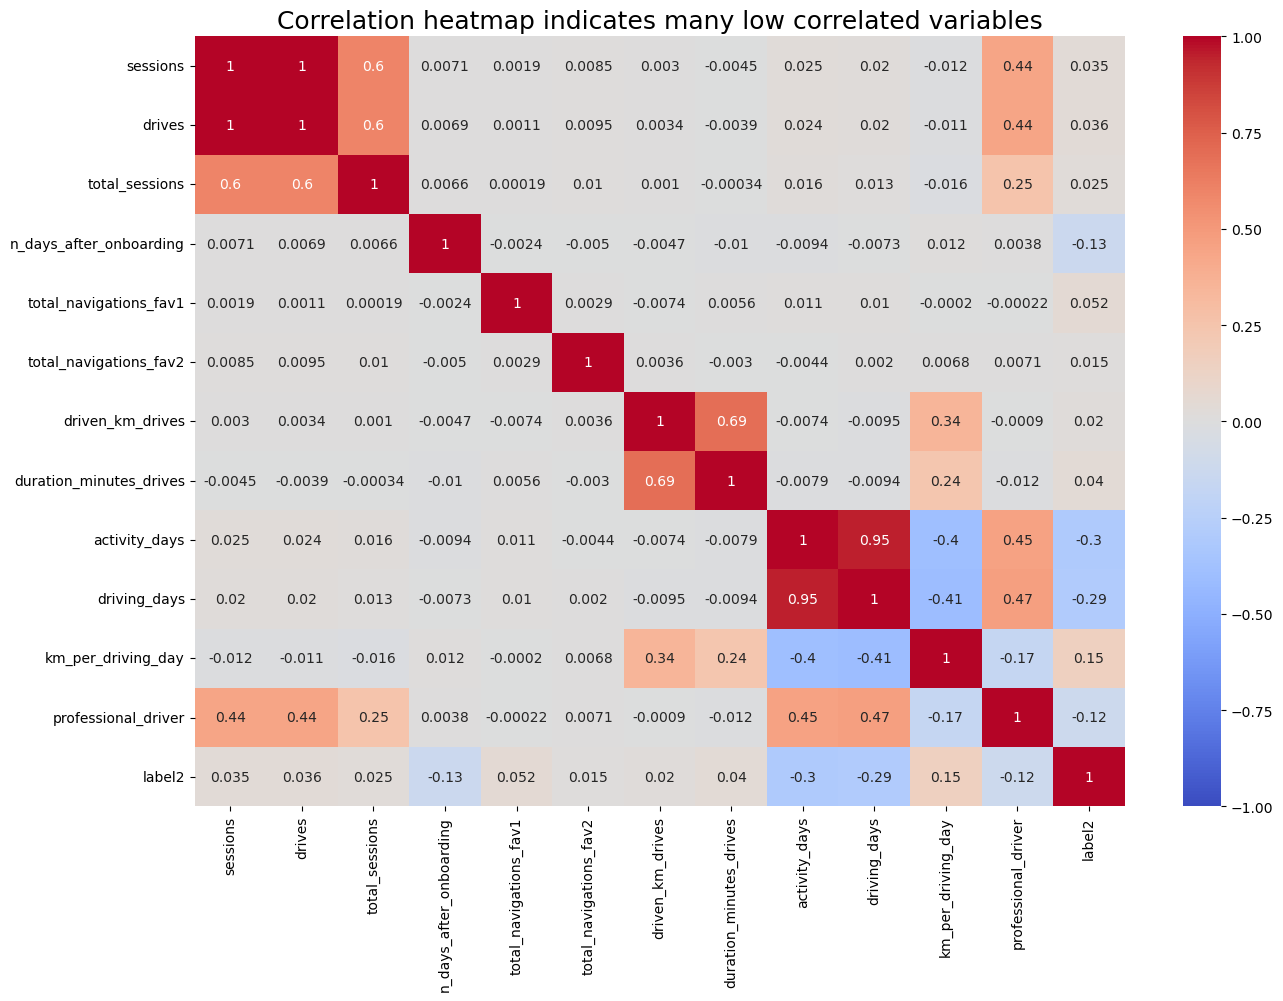

In [82]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson',numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

#### **Key Takeaway**

-  Predictor variables with  **Pearson correlation coefficient value** > **absolute value of 0.7** are considered strongly multicollinear. 
-  i will include only one of these varriable to avoid multicollinearity


**Note:** Threshold = **0.7**, can vary as per industry standards/ modeling requirements. Other thresholds like 0.6 or 0.8 may be used.

**Question:** Which variables are multicollinear with each other?

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*

## **Activity 3b - Creating Binary Column for `device`**

- **Objective:** Using `device` variable as an X variable requires to encode this **categorical variable** with binary column for user device, as follow

  - `Android` -> `0`
  - `iPhone` -> `1`

*Lets create the binary column 'device2'*


In [83]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### **Task 3d. Model building**

#### **Assign predictor variables and target**

To build our model, we need to determine the X variables that will be included to **predict our target variable**, `label2`

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** 
- Notice that `sessions` and `driving_days` were selected to be **dropped**, rather than `drives` and `activity_days`. 
- Features that were kept for modeling had **stronger correlations** with the **target variable** than the features that were dropped.



In [84]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [85]:
# Isolate target variable
y = df['label2']

In [86]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### **Split the Data**

Use scikit-learn's `train_test_split()` function to perform a **train/test split** on data using the `X` and `y` variables.

*Important Notes:*

1. **It is important to do a train test** to obtain accurate predictions. We will **fit our model on the training set** and **evaluate the model on the test set** to avoid data leakage.

2. **Target class is imbalanced (82% retained vs. 18% churned)**, it under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.


In [87]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [88]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


*Set `penalty = None` as our predictors are unscaled and fit model on `X_train` and `y_train`.*


In [89]:
model = LogisticRegression(penalty='none', max_iter=400)
model.fit(X_train, y_train)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

Call the **`.coef_` attribute** on the model to get the coefficients of each variable. it represents change in **log odds** the target variable for **every one unit increase in X**.

Lets create as series where index is column names and values are coefficient in `model.coef_`.

In [90]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64

In [91]:
model.intercept_

array([-0.00170675])

## Logistic Regression Assumption Verification
### Final Assumption: Verify Linearity

- **Objective:** Confirm the linear relationship between X variables and estimated log odds (logits).

- **Approach:** Use a regression plot (`regplot`) to assess linearity.

#### Probability Calculation

- Calculate probability estimates for each sample in the training data using the `predict_proba()` method.
- Assign the result to a variable called `training_probabilities`. This results in a 2-D array with probabilities of users not churning (first column) and users churning (second column).

This verification step ensures that the logistic regression model's linearity assumption holds.

In [92]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93963478, 0.06036522],
       [0.61967313, 0.38032687],
       [0.76463195, 0.23536805],
       ...,
       [0.91909646, 0.08090354],
       [0.85092102, 0.14907898],
       [0.93516299, 0.06483701]])

In logistic regression, the log-odds (a.k.a., logit) of the dependent variable w.r.t the predictor variable should be linear.

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the **logit** for **each user**.


In [93]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

*Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.*

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

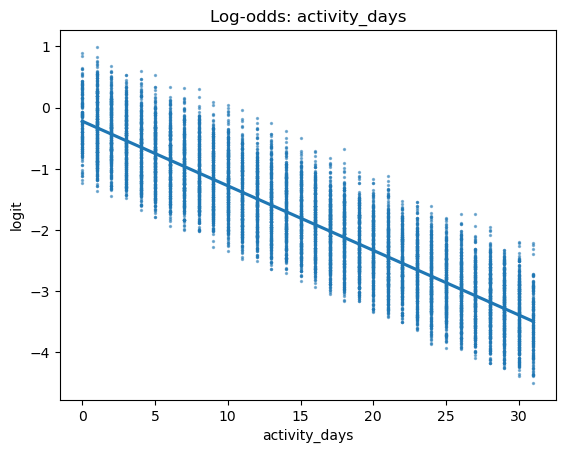

In [94]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

### **Activity 4a - Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [95]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

#### Accuracy of Model

In [96]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8237762237762237

### **Activity - 4b Show results with a confusion matrix**

In [97]:
cm = confusion_matrix(y_test, y_preds)

Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

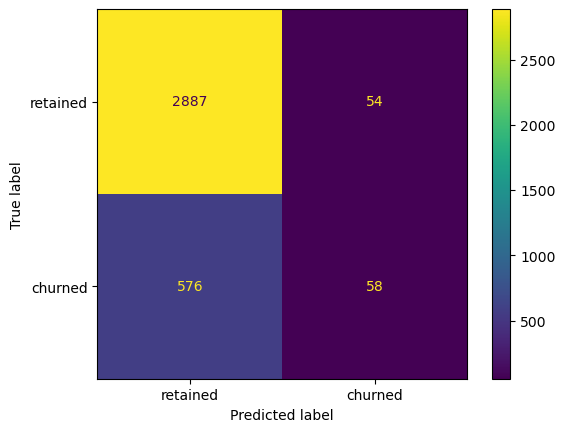

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [99]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5178571428571429

In [100]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.0914826498422713

In [101]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Note:** The model has **mediocre precision** and **very low recall**, which means that it makes a lot of **false negative** predictions and fails to capture users who will churn.

### **Activity 4c - Feature Importance**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [102]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0019133762927589937),
 ('total_navigations_fav1', 0.001231756305699262),
 ('total_navigations_fav2', 0.0009314812728033822),
 ('total_sessions', 0.00032706262009598783),
 ('duration_minutes_drives', 0.00010909317475950597),
 ('km_per_driving_day', 1.8222724163343754e-05),
 ('driven_km_drives', -1.4860071085383861e-05),
 ('n_days_after_onboarding', -0.0004064774569090166),
 ('device2', -0.0010412181199881952),
 ('professional_driver', -0.001528505006111597),
 ('activity_days', -0.10603202481504369)]

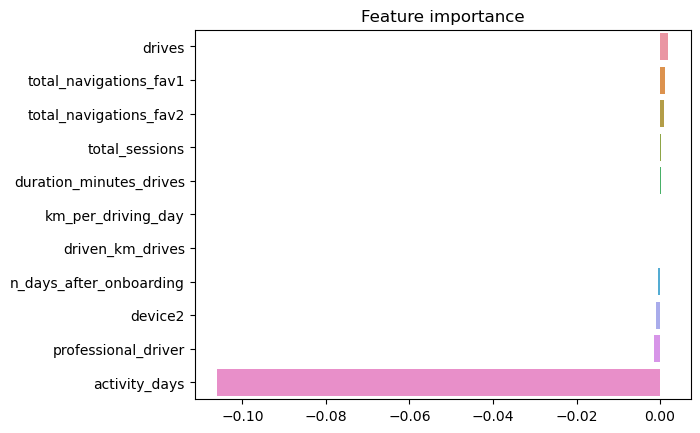

In [103]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### **Activity 4d - Conclusion**

**1. Influential Variable and Impact**

> **Most Influential Variable:* *activity_days* had the most significant impact on the model's predictions. It exhibited a negative correlation with user churn. This outcome was as expected because *activity_days* was strongly correlated with *driving_days*, which had a known negative correlation with churn.*Most Influential Variable:* *activity_days* had the most significant impact on the model's predictions. It exhibited a negative correlation with user churn. This outcome was as expected because *activity_days* was strongly correlated with *driving_days*, which had a known negative correlation with churn.*

**2. Variables that Fell Short of Expectations**

> *Expected Strong Predictors:* Yes, there were variables that didn't perform as anticipated. For instance, during the exploratory data analysis (EDA) phase, a high *km_per_driving_day* was thought to be a robust predictor due to its positive correlation with churn. However, in the final model, it surprisingly ranked as the second-least-important variable.*

**3. Understanding Variable Importance**
> *Variable Importance:* It's essential to note that in multiple logistic regression models, feature interactions can lead to unexpected and counterintuitive relationships. This inherent complexity can make the model's behavior more challenging to explain, which is both a strength and a weakness of predictive models*

**4. Recommendation for Model Usage**

> *Recommendation:* The decision to use this model depends on its intended purpose. If the model will inform critical business decisions, it is not advisable, primarily due to its poor recall score. However, if the goal is purely exploratory, the model can offer valuable insights.*

**5. Enhancement Strategies**

*Model Improvement:* To enhance model performance, consider the following strategies:

> - **Feature Engineering:** Explore the creation of new features based on domain knowledge.
> - **Scaling Variables:** Scale predictor variables to ensure consistent contributions.
> - **Alternative Variable Combinations:** Experiment with different combinations of predictor variables to reduce noise from uninformative features.<br>


**6. Desired Additional Features**

*Additional Features:* The following additional features would contribute to improving the model:

> - User-level drive information, including drive times and geographic locations.
> - Granular user interaction data, such as the frequency of reporting or confirming road hazard alerts.
> - Monthly counts of unique starting and ending locations for each driver, providing valuable insights into user behavior.

---